# Midterm Project (Team 1) - Narges DeBary

**Naomi Berumen, Karen Crum**

Steps: Both team members made a draft of the entire midterm. We analyzed each other's notebook and we talked about the things we did different, keeping the more appropriate or the simplest approach. 

## Step 1: Introduction

1. Context: Midterm Exam group project to demonstrate understanding of key concepts and operations in data analysis.
2. Objectives: To explore the dataset, 'sneakers.csv', using techniques learned throughout the course for importing dependencies, reading the dataset, basic data exploration, visualization, and utilizing these processes to formulate and answer data mining questions.
3. Data Description: This dataset is comprised of 3268 rows of data entered into 8 column variables:
   - Product Name: the name of the product.
   - Product ID: the alphanumeric ID assigned to the product.
   - Listing Price: the price the product is listed to be sold at.
   - Sale Price: the actual price assigned to the product for purchase.
   - Discount: the percentage difference between the listing and sale prices.
   - Brand: the brand of the product. There are 4 unique brand categories represented.
   - Rating: the average rating given by consumer(s) for the product from 1-5 averaged from number of reviews.
   - Reviews: the number of reviews submitted for the product.

## Step 2: Importing Libraries 

In [1]:
# importing libraries 
import numpy as np 
import pandas as pd
import math 
import os 

# importing visualization 
import matplotlib.pyplot as plt
import seaborn as sns 

# warnings 
import warnings 
warnings.filterwarnings('ignore')

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 3: Load the Dataset 

In [2]:
# load the dataset 
df = pd.read_csv('sneakers.csv')

In [3]:
# copy the dataset 
sneakers = df.copy()

## Step 4: EDA

**A. Basic Data Exploration**

In [4]:
sneakers.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [5]:
sneakers.tail()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4
3267,Nike P-6000 SE,CJ9585-600,8995,6297,0,Nike,0.0,0


In [6]:
sneakers.shape

(3268, 8)

In [7]:
sneakers.size

26144

In [8]:
sneakers.ndim

2

In [9]:
sneakers.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [10]:
# rename columns 
sneakers = sneakers.rename(columns={'Product Name':'Product_Name',
                                   'Product ID':'Product_ID',
                                   'Listing Price':'Listing_Price',
                                   'Sale Price':'Sale_Price'})

In [11]:
sneakers.columns

Index(['Product_Name', 'Product_ID', 'Listing_Price', 'Sale_Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [12]:
sneakers.isnull().sum()

Product_Name     0
Product_ID       0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [13]:
sneakers.dtypes

Product_Name      object
Product_ID        object
Listing_Price      int64
Sale_Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

**Observation**
- There is a value of 0 in the Listing Price in one of the rows of the tail.
- isnull() showed no missing values, but there are some values that are expected displaying 0.
- Columns are renamed to maintain clarity.

In [14]:
# looking for duplicates 
sneakers[sneakers.duplicated()].count()

Product_Name     88
Product_ID       88
Listing_Price    88
Sale_Price       88
Discount         88
Brand            88
Rating           88
Reviews          88
dtype: int64

In [15]:
# cleaning the duplicates 
sneakers.drop_duplicates(inplace=True, ignore_index=True)

In [16]:
# check for duplicates 
sneakers[sneakers.duplicated()].count()

Product_Name     0
Product_ID       0
Listing_Price    0
Sale_Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [17]:
# Statisitical summary of numerial values
sneakers.describe().T

,count,mean,std,min,25%,50%,75%,max
Listing_Price,3180.0,6992.707547,4677.133304,0.0,4599.0,5999.0,8999.0,29999.0
Sale_Price,3180.0,6027.742767,4192.481308,449.0,2999.0,4599.0,7995.0,36500.0
Discount,3180.0,27.619497,22.492385,0.0,0.0,40.0,50.0,60.0
Rating,3180.0,3.266635,1.393592,0.0,2.6,3.5,4.4,5.0
Reviews,3180.0,41.529560,31.373989,0.0,12.0,39.0,69.0,223.0


In [18]:
# Statistical summary of object values
sneakers.describe(include=object).T

,count,unique,top,freq
Product_Name,3180,1531,Women's adidas Originals Sambarose Shoes,16
Product_ID,3180,3179,CI2668-004,2
Brand,3180,5,Adidas CORE / NEO,1111


In [19]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_Name   3180 non-null   object 
 1   Product_ID     3180 non-null   object 
 2   Listing_Price  3180 non-null   int64  
 3   Sale_Price     3180 non-null   int64  
 4   Discount       3180 non-null   int64  
 5   Brand          3180 non-null   object 
 6   Rating         3180 non-null   float64
 7   Reviews        3180 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 198.9+ KB


In [20]:
# which brand has the highest number of products 
sneakers.value_counts('Brand')

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Adidas SPORT PERFORMANCE     606
Nike                         555
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

In [21]:
# Rename the single value removing the extraneous 'Adidas' from the name and check counts again
# The mis-labeled brand has been added to the correct category name
sneakers.loc[0, 'Brand'] = 'Adidas ORIGINALS'
sneakers['Brand'].value_counts()# Fill in missing values in Listing Price using the mean of Discount applied to Sale Price

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             908
Adidas SPORT PERFORMANCE     606
Nike                         555
Name: count, dtype: int64

In [22]:
# how many product have a listing price of 0
sneakers[sneakers['Listing_Price'] == 0]

,Product_Name,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
2625,Nike Air Force 1 '07 Essential,CJ1646-600,0,7495,0,Nike,0.0,0
2626,Nike Air Force 1 '07,CT4328-101,0,7495,0,Nike,0.0,0
2627,Nike Air Force 1 Sage Low LX,CI3482-200,0,9995,0,Nike,0.0,0
2628,Nike Air Max Dia SE,CD0479-200,0,9995,0,Nike,0.0,0
2629,Nike Air Max Verona,CZ6156-101,0,9995,0,Nike,0.0,0
...,...,...,...,...,...,...,...,...
3172,Nike Mercurial Vapor 13 Club MG,AT7968-606,0,4995,0,Nike,0.0,0
3174,Air Jordan 5 Retro,CD2722-001,0,15995,0,Nike,3.3,3
3175,Nike Tiempo Legend 8 Academy TF,AT6100-606,0,6495,0,Nike,0.0,0
3176,Nike React Metcon AMP,CT9155-063,0,13995,0,Nike,3.0,1


In [23]:
# Fill in missing values in Listing Price using the mean of Discount applied to Sale Price
for index, row in sneakers.iterrows():
    if row['Listing_Price'] ==0:
        sale_price = row['Sale_Price']
        sneakers.at[index, 'Listing_Price'] = sale_price

**Observation**
- Listing Prices set to 0 were values absent from the data
- The missing values were replaced with the sale price value as it is the most highly correlated values.

In [24]:
# What are the names of the 10 highest rated products? 
# isolated 5.0, the highest rating, and then sorted them by the most reviews 
sneakers[sneakers['Rating'] == 5.0].sort_values('Reviews', ascending=False).head(10)

,Product_Name,Product_ID,Listing_Price,Sale_Price,Discount,Brand,Rating,Reviews
1800,Men's adidas Running Asweego Shoes,F35560,7999,3999,50,Adidas CORE / NEO,5.0,99
267,Men's adidas Toe Side II Slippers,CM0070,1299,779,40,Adidas CORE / NEO,5.0,99
1849,MEN'S ADIDAS RUNNING NAYO 2.0 SHOES,CJ7975,5299,2649,50,Adidas CORE / NEO,5.0,97
1039,Men's adidas Sport Inspired Court Adapt Shoes,F36417,5999,4199,30,Adidas CORE / NEO,5.0,96
2505,Men's adidas Originals Liberty Cup Shoes,EE6111,7599,4559,40,Adidas ORIGINALS,5.0,94
731,WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEKNIT SHOES,B96508,11999,5999,50,Adidas ORIGINALS,5.0,92
1476,Men's adidas Originals Superstar MG Shoes,FV3029,7999,7999,0,Adidas ORIGINALS,5.0,90
1972,Men's adidas Sport Inspired Lite Racer RBN Shoes,EG4009,5999,5999,0,Adidas CORE / NEO,5.0,89
1049,Men's adidas Running Norad Shoes,CK9456,4999,2499,50,Adidas CORE / NEO,5.0,89
2033,MEN'S ADIDAS ORIGINALS GAZELLE SHOES,B37945,7999,3999,50,Adidas ORIGINALS,5.0,79


In [25]:
# What are the 10 products name with the highest number of reviews? 
# create a variable that has the 10 values for review 
top_reviews = sneakers.nlargest(10, 'Reviews')

# call the variable including the Product Name
top_reviews[['Product_Name', 'Reviews']]

,Product_Name,Reviews
2750,Air Jordan 10 Retro,223
2804,Nike Zoom Fly,105
89,Men's adidas Running Galaxy 4 Shoes,99
267,Men's adidas Toe Side II Slippers,99
319,Men's adidas Sport Inspired Archivo Shoes,99
425,Men's adidas Sport Inspired Run 60s Shoes,99
492,Women's adidias Originals Supercourt Shoes,99
560,Men's adidas Outdoor Geocach 19 Shoes,99
667,Men's adidas RUNNING Stardrift Low Shoes,99
723,Women's adidas Sport Inspired Farm Rio Advanta...,99


In [26]:
# check for the amount of sneakers that also has 99 reviews 
sneakers[sneakers['Reviews'] == 99].count()

Product_Name     19
Product_ID       19
Listing_Price    19
Sale_Price       19
Discount         19
Brand            19
Rating           19
Reviews          19
dtype: int64

**Observation:**
- 19 products have received a total of 99 reviews, there are only 8 of those 19 shown on the top 10 graph.
- The identical values are ordered by their index values, ascending in order

In [27]:
# Which company gives more discount: Adidas or Nike? 
# Make a new dataframe to group all of the Adidas Brand name shoes together 
sneakers_brand = sneakers.copy()

# Merge all of the Adidas values together 
# Define the mapping for merging the values
brand_mapping = {
    'Adidas CORE / NEO': 'Adidas',
    'Adidas ORIGINALS': 'Adidas',
    'Adidas SPORT PERFORMANCE': 'Adidas'

}

# Replace the values in the 'Brand' column using the mapping
sneakers_brand['Brand'] = sneakers_brand['Brand'].replace(brand_mapping)

In [28]:
# Check to see the values in Brands 
sneakers_brand.value_counts('Brand')

Brand
Adidas    2625
Nike       555
Name: count, dtype: int64

In [29]:
# check the statistics for Adidas 
sneakers_brand[sneakers_brand['Brand'] == 'Adidas'].describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,2625.000000,2625.000000,2625.000000,2625.000000,2625.000000
mean,7600.980952,5135.004190,33.459048,3.366362,48.725714
std,4071.014515,3589.990374,20.431622,1.159873,28.926042
min,899.000000,449.000000,0.000000,0.000000,0.000000
25%,4999.000000,2799.000000,0.000000,2.700000,24.000000
50%,6599.000000,3999.000000,40.000000,3.500000,49.000000
75%,8999.000000,6499.000000,50.000000,4.300000,74.000000
max,29999.000000,29999.000000,60.000000,5.000000,99.000000


In [30]:
# check the statistics for Nike 
sneakers_brand[sneakers_brand['Brand'] == 'Nike'].describe()

,Listing_Price,Sale_Price,Discount,Rating,Reviews
count,555.000000,555.000000,555.0,555.000000,555.000000
mean,11424.018018,10250.154955,0.0,2.794955,7.493694
std,4320.406137,4263.802799,0.0,2.121859,16.714027
min,1595.000000,1595.000000,0.0,0.000000,0.000000
25%,7995.000000,7197.000000,0.0,0.000000,0.000000
50%,10995.000000,9995.000000,0.0,3.900000,2.000000
75%,14995.000000,12896.000000,0.0,4.600000,7.000000
max,36500.000000,36500.000000,0.0,5.000000,223.000000


**Observation:**
- Nike does not give a discount
- Adidas brand categories represent most of the available data

**B. Univariate, Bivariate, Multivariate Analysis**

**Univariate**

In [31]:
# create dataset for listing price 
listing_price = sneakers['Listing_Price']

In [32]:
# EDA for new dataset 
listing_price.head()

0    14999
1     7599
2      999
3     6999
4     7999
Name: Listing_Price, dtype: int64

In [33]:
listing_price.shape

(3180,)

In [34]:
len(listing_price)

3180

In [35]:
listing_price.isnull().sum()

0

In [36]:
listing_price.value_counts()

Listing_Price
7999     331
5999     214
4999     185
5599     178
4599     164
        ... 
1199       1
8499       1
2299       1
7499       1
36500      1
Name: count, Length: 96, dtype: int64

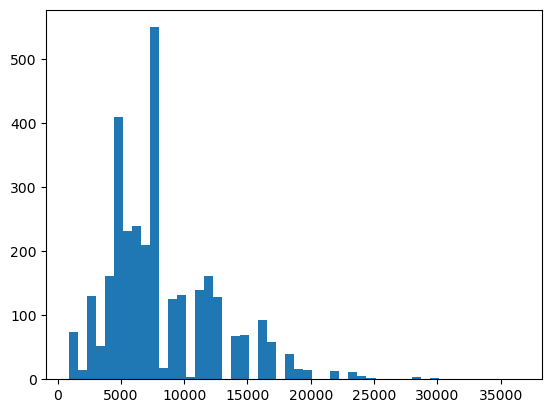

In [37]:
# check for data distribution 
plt.hist(listing_price, bins=50);

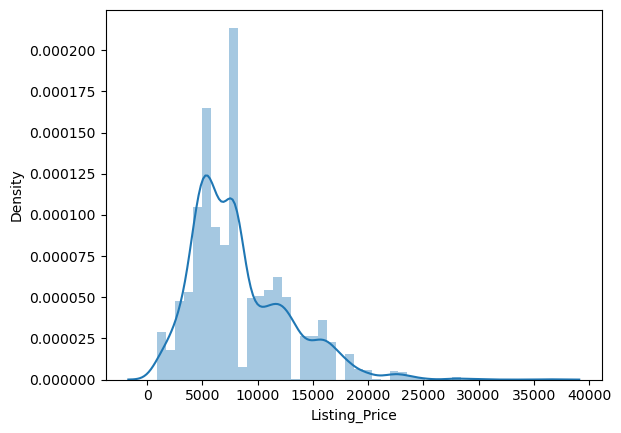

In [38]:
sns.distplot(listing_price);

In [39]:
# products with listing price less than 15000
listing_price[listing_price < 15000].count()

2918

In [40]:
# create new dataset for sale price
sale_price = sneakers['Sale_Price']

In [41]:
# EDA for sale price 
sale_price.head()

0    7499
1    3799
2     599
3    3499
4    3999
Name: Sale_Price, dtype: int64

In [42]:
sale_price.shape

(3180,)

In [43]:
sale_price.value_counts()

Sale_Price
3999     159
2999     142
4799     105
2799     104
2499     103
        ... 
6800       1
3995       1
13299      1
3219       1
7597       1
Name: count, Length: 227, dtype: int64

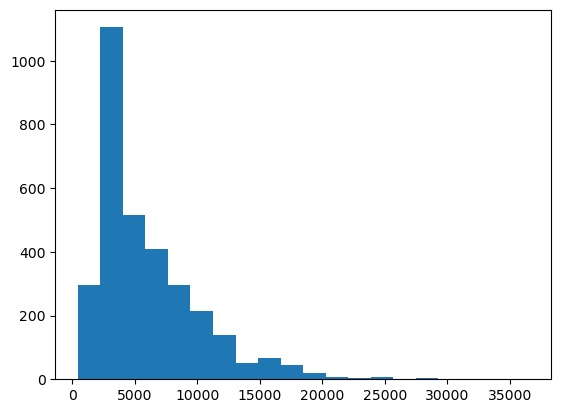

In [44]:
# fiding data distribution 
plt.hist(sale_price, bins=20);

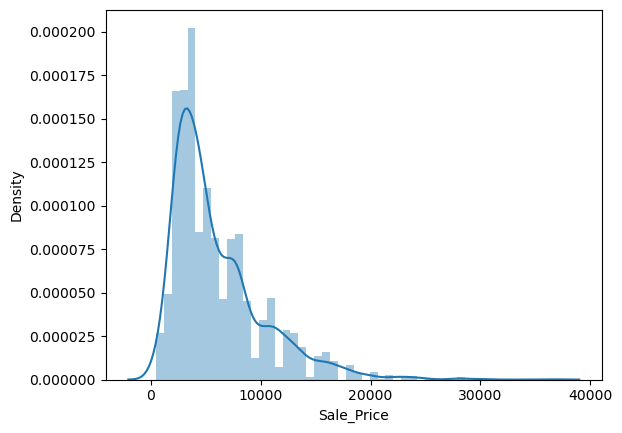

In [45]:
sns.distplot(sale_price);

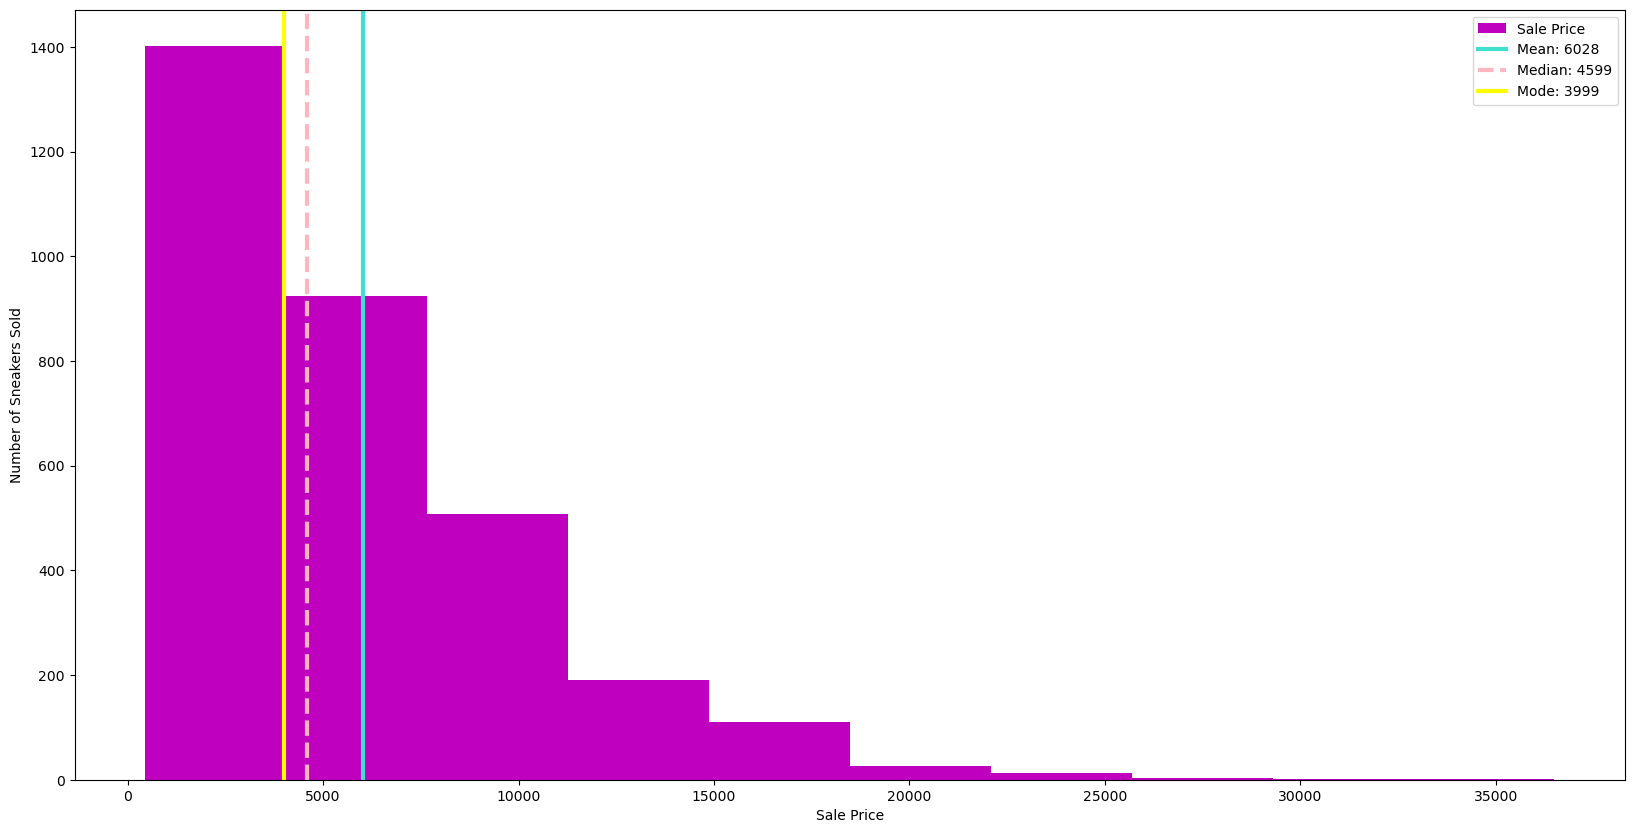

In [46]:
# Histogram with multiple data points for a single variable 'Sale Price'

# creating the size of the plot
plt.figure(figsize = (20, 10))

# creating the color for the plot
plt.hist(sale_price, color='m', label='Sale Price')

# Set custom label for x and y axis
plt.xlabel('Sale Price')
plt.ylabel('Number of Sneakers Sold')

# Calculating the mean 
mean_value = sale_price.mean()
plt.axvline(mean_value, color='turquoise', linestyle='-', linewidth=3, label=f'Mean: {mean_value:.0f}')

# Calculating the median
median_value = sale_price.median()
plt.axvline(median_value, color='lightpink', linestyle='--', linewidth=3, label=f'Median: {median_value:.0f}')

# Calculating the mode
mode_value = sale_price.mode()[0]
plt.axvline(mode_value, color='yellow', linestyle='-', linewidth=3, label=f'Mode: {mode_value:.0f}')

# Display a legend showing the value represented and the color reference
plt.legend()
plt.show()

In [47]:
# Find the percentage for products with sale price less than 15000
sale_price[sale_price < 15000].count()*100/len(sale_price)

96.0377358490566

In [48]:
# create dataset for discount
discount = sneakers['Discount']

In [49]:
# EDA for discount
discount.head()

0    50
1    50
2    40
3    50
4    50
Name: Discount, dtype: int64

In [50]:
# what are the 3 highest percentages of the discount graph 
discount.value_counts().sort_values(ascending=False)

Discount
0     1214
50     994
40     763
30      99
60      61
20      49
Name: count, dtype: int64

In [51]:
discount.shape

(3180,)

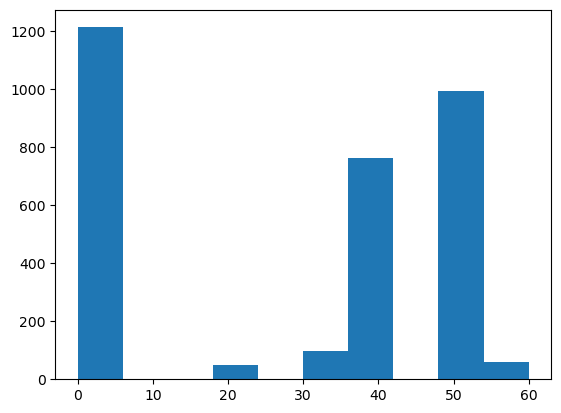

In [52]:
# data distribution 
plt.hist(discount);

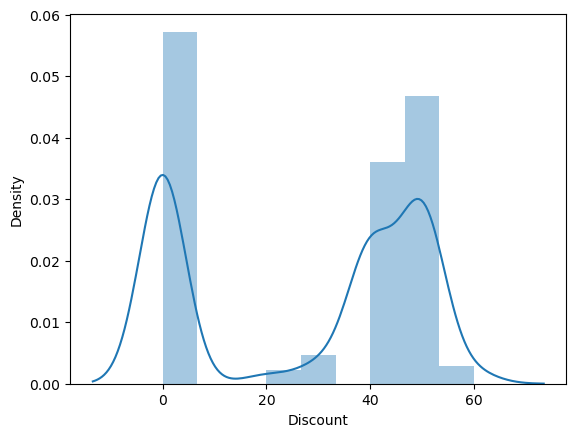

In [53]:
sns.distplot(discount);

In [54]:
# Find the percentage for products with at least 50 percent discount
discount[discount >= 50].count()* 100 / len(discount)

33.17610062893082

In [55]:
# Find the percentage of the overall df variable represented by the top 3 values
top_percent_values = {50.0:994 / len(sneakers) * 100, 40.0:809 / len(sneakers) * 100, 0.0:659 / len(sneakers) * 100}
print(top_percent_values) 

{50.0: 31.257861635220124, 40.0: 25.440251572327043, 0.0: 20.723270440251575}


In [56]:
# create dataset for reviews 
reviews = sneakers['Reviews']

In [57]:
# EDA for reviews 
reviews.head()

0    41
1    24
2    37
3    35
4    72
Name: Reviews, dtype: int64

In [58]:
reviews.value_counts()

Reviews
0      218
1      117
2       81
3       56
5       54
      ... 
99      19
55      15
60      14
223      1
105      1
Name: count, Length: 102, dtype: int64

In [59]:
reviews.shape

(3180,)

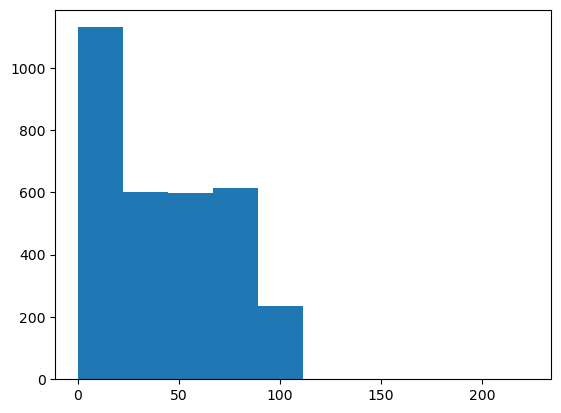

In [60]:
# data distribution 
plt.hist(reviews);

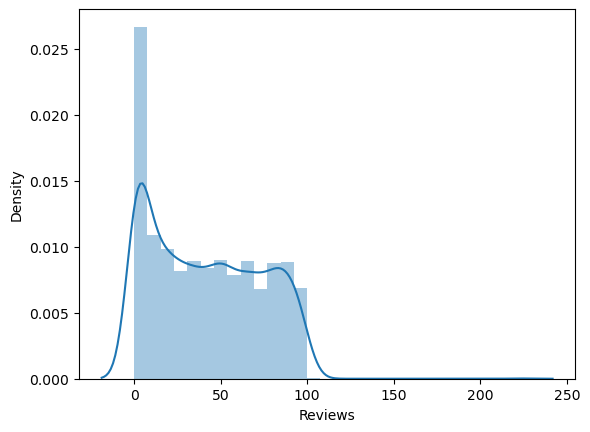

In [61]:
sns.distplot(reviews);

In [62]:
# Find the percentage of products with review numbers less than 100 
reviews[reviews < 100].count()* 100 / len(reviews)

99.937106918239

In [63]:
# create dataset for rating
rating = sneakers['Rating']

In [64]:
# EDA for rating
rating.head()

0    4.8
1    3.3
2    2.6
3    4.1
4    3.5
Name: Rating, dtype: float64

In [65]:
rating.value_counts()

Rating
0.0    263
5.0    193
4.4    113
4.5    111
4.2    110
4.7    106
4.0    105
4.8    104
4.1    103
1.0    100
3.5     99
4.9     98
3.8     97
2.8     95
4.3     92
3.0     91
2.4     90
3.9     90
4.6     87
3.7     87
3.6     87
2.0     85
3.1     85
2.5     83
2.7     83
2.6     82
2.2     78
3.4     74
2.9     74
3.2     73
3.3     72
1.5     70
Name: count, dtype: int64

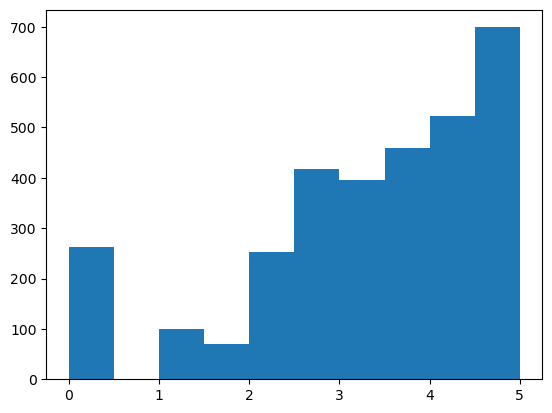

In [66]:
# data distribution 
plt.hist(rating);

In [67]:
# rating less than 3.5
rating[rating < 3.5].count()* 100 / len(rating)

47.106918238993714

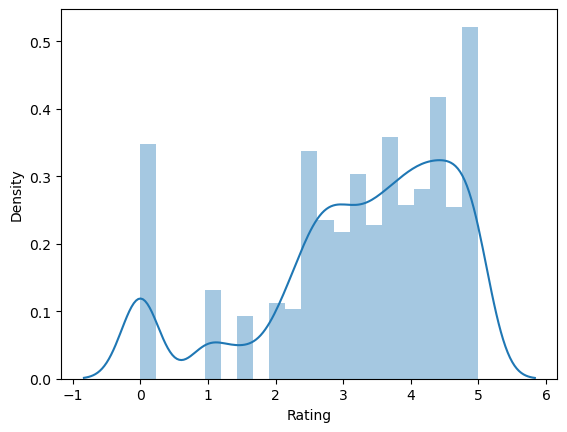

In [68]:
sns.distplot(rating);

**Bivariate**

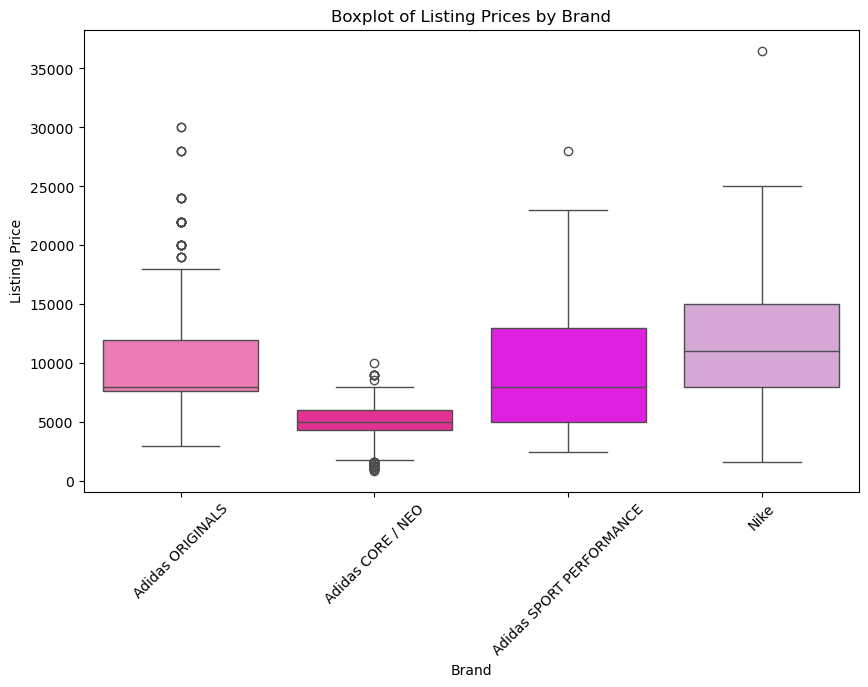

In [69]:
# Boxplot showing how Listing Price varies by Brand
plt.figure(figsize=(10, 6))
sns.boxplot(data=sneakers, x='Brand', y='Listing_Price', palette=['hotpink', 'deeppink', 'fuchsia', 'plum'])
plt.title('Boxplot of Listing Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Listing Price')
plt.xticks(rotation=45)
plt.show()

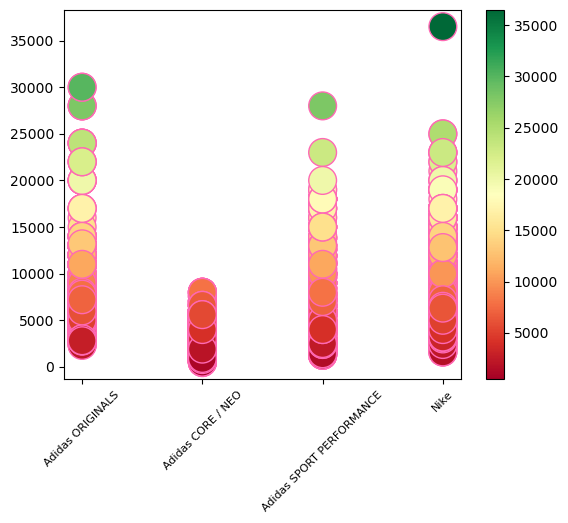

In [70]:
# Scatter plot showing the distribution of Sale Price by Brand
x = sneakers['Brand']
y = sneakers['Sale_Price']

plt.scatter(x, y, c=y, cmap='RdYlGn', s=400, edgecolors='hotpink'); # edgecolors='black' adds black line around the dots
plt.colorbar();
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels by 45 degrees and set font size
plt.show()

**Multivariate**

In [71]:
# Create a dataframe examining all the variables with numeric values 
numeric_sneakers = sneakers[['Reviews', 'Rating', 'Discount', 'Sale_Price', 'Listing_Price']]
numeric_sneakers

,Reviews,Rating,Discount,Sale_Price,Listing_Price
0,41,4.8,50,7499,14999
1,24,3.3,50,3799,7599
2,37,2.6,40,599,999
3,35,4.1,50,3499,6999
4,72,3.5,50,3999,7999
...,...,...,...,...,...
3175,0,0.0,0,6495,6495
3176,1,3.0,0,13995,13995
3177,1,5.0,0,12797,15995
3178,4,4.0,0,16995,16995


In [72]:
# Create a correlation table 
numeric_sneakers.corr()

,Reviews,Rating,Discount,Sale_Price,Listing_Price
Reviews,1.000000,0.122349,0.287762,-0.228735,-0.160581
Rating,0.122349,1.000000,0.064803,-0.043417,-0.021109
Discount,0.287762,0.064803,1.000000,-0.598524,-0.253080
Sale_Price,-0.228735,-0.043417,-0.598524,1.000000,0.881103
Listing_Price,-0.160581,-0.021109,-0.253080,0.881103,1.000000


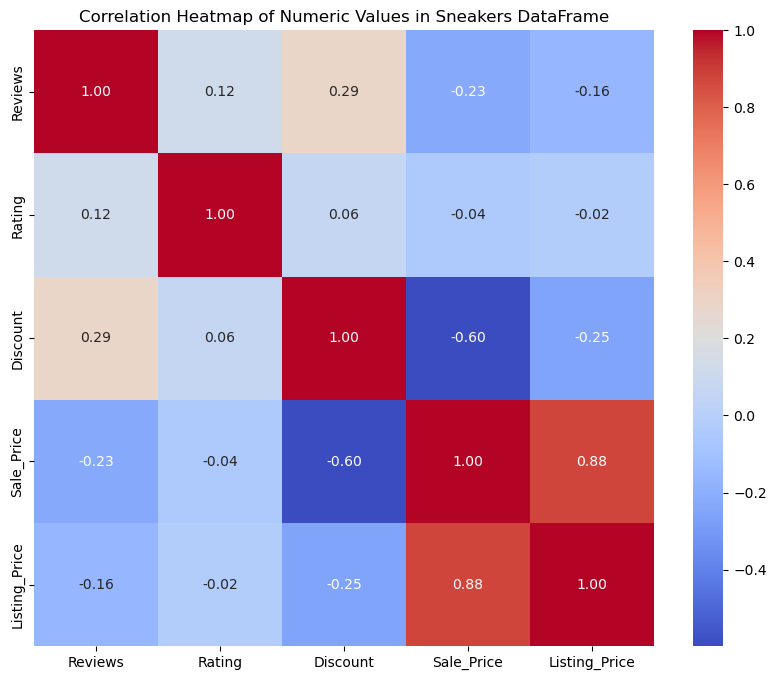

In [73]:
# Plot a heatmap of the numeric values 
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(numeric_sneakers.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Values in Sneakers DataFrame')
plt.show()

**C. Visualization**

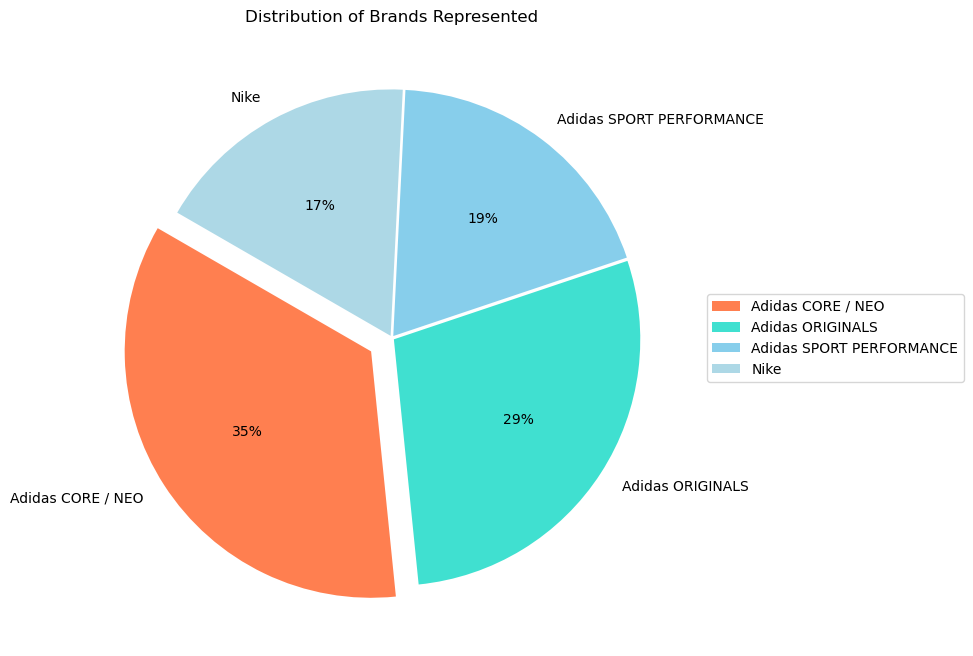

In [74]:
# Create the pie chart for showing the proportion of a Brand category compared to the whole
brand_counts = sneakers['Brand'].value_counts()

# Separate the slices with a wedge, here the largest section is separated with a wider margin to differentiate it
wedge = [0.1, 0.01, 0.01, 0.01]
# Set custom colors for each wedge
colr = ['coral', 'turquoise', 'skyblue', 'lightblue'] 

plt.figure(figsize=(8,8))
plt.pie(brand_counts, labels=brand_counts.index, explode=wedge, colors=colr, autopct='%1.0f%%', startangle=150)
plt.title('Distribution of Brands Represented')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # legend for the color categories
plt.show()

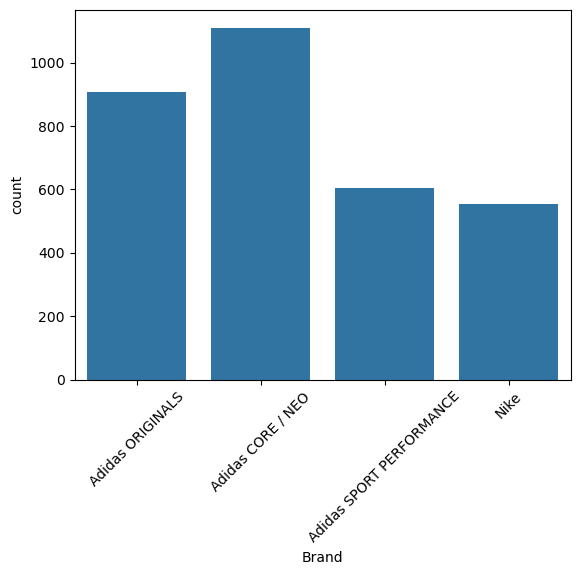

In [75]:
# Bar graph showing frequencies of Brand categories
sns.countplot(data=sneakers, x='Brand')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

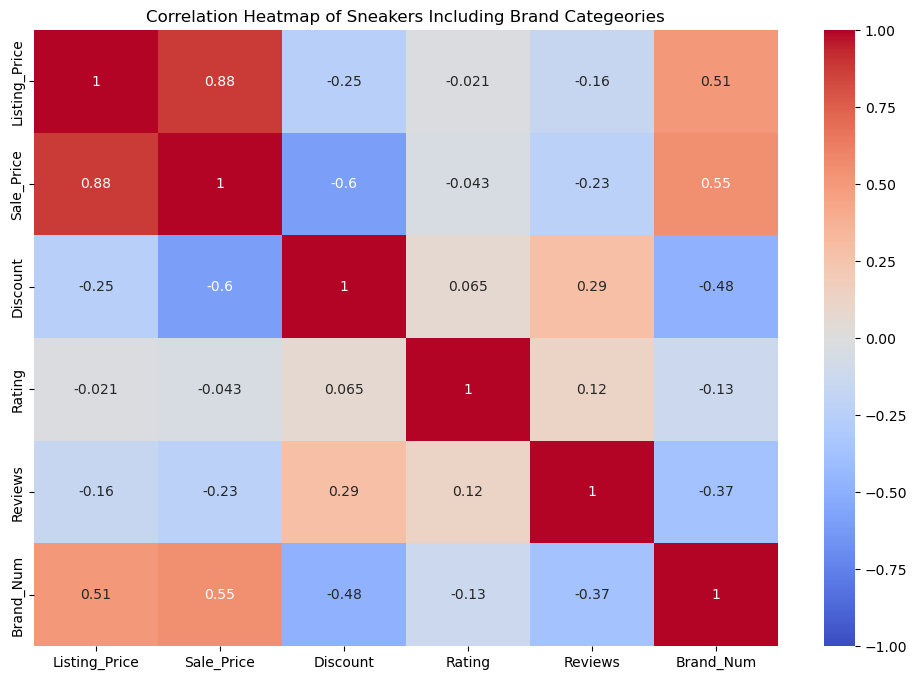

In [76]:
# Heatmap including Brand categories
# Create dictionary to hold numerical representations for each Brand category name
brand_mapping = {'Adidas CORE / NEO': 0, 'Adidas ORIGINALS': 1, 'Adidas SPORT PERFORMANCE': 2, 'Nike': 3}

# Add a column 'Brand Num' to the df to hold the numerical Brand values
sneakers['Brand_Num'] = sneakers['Brand'].map(brand_mapping)

# Select numeric columns for correlation calculation
numeric_columns = sneakers.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Sneakers Including Brand Categeories')
plt.show()

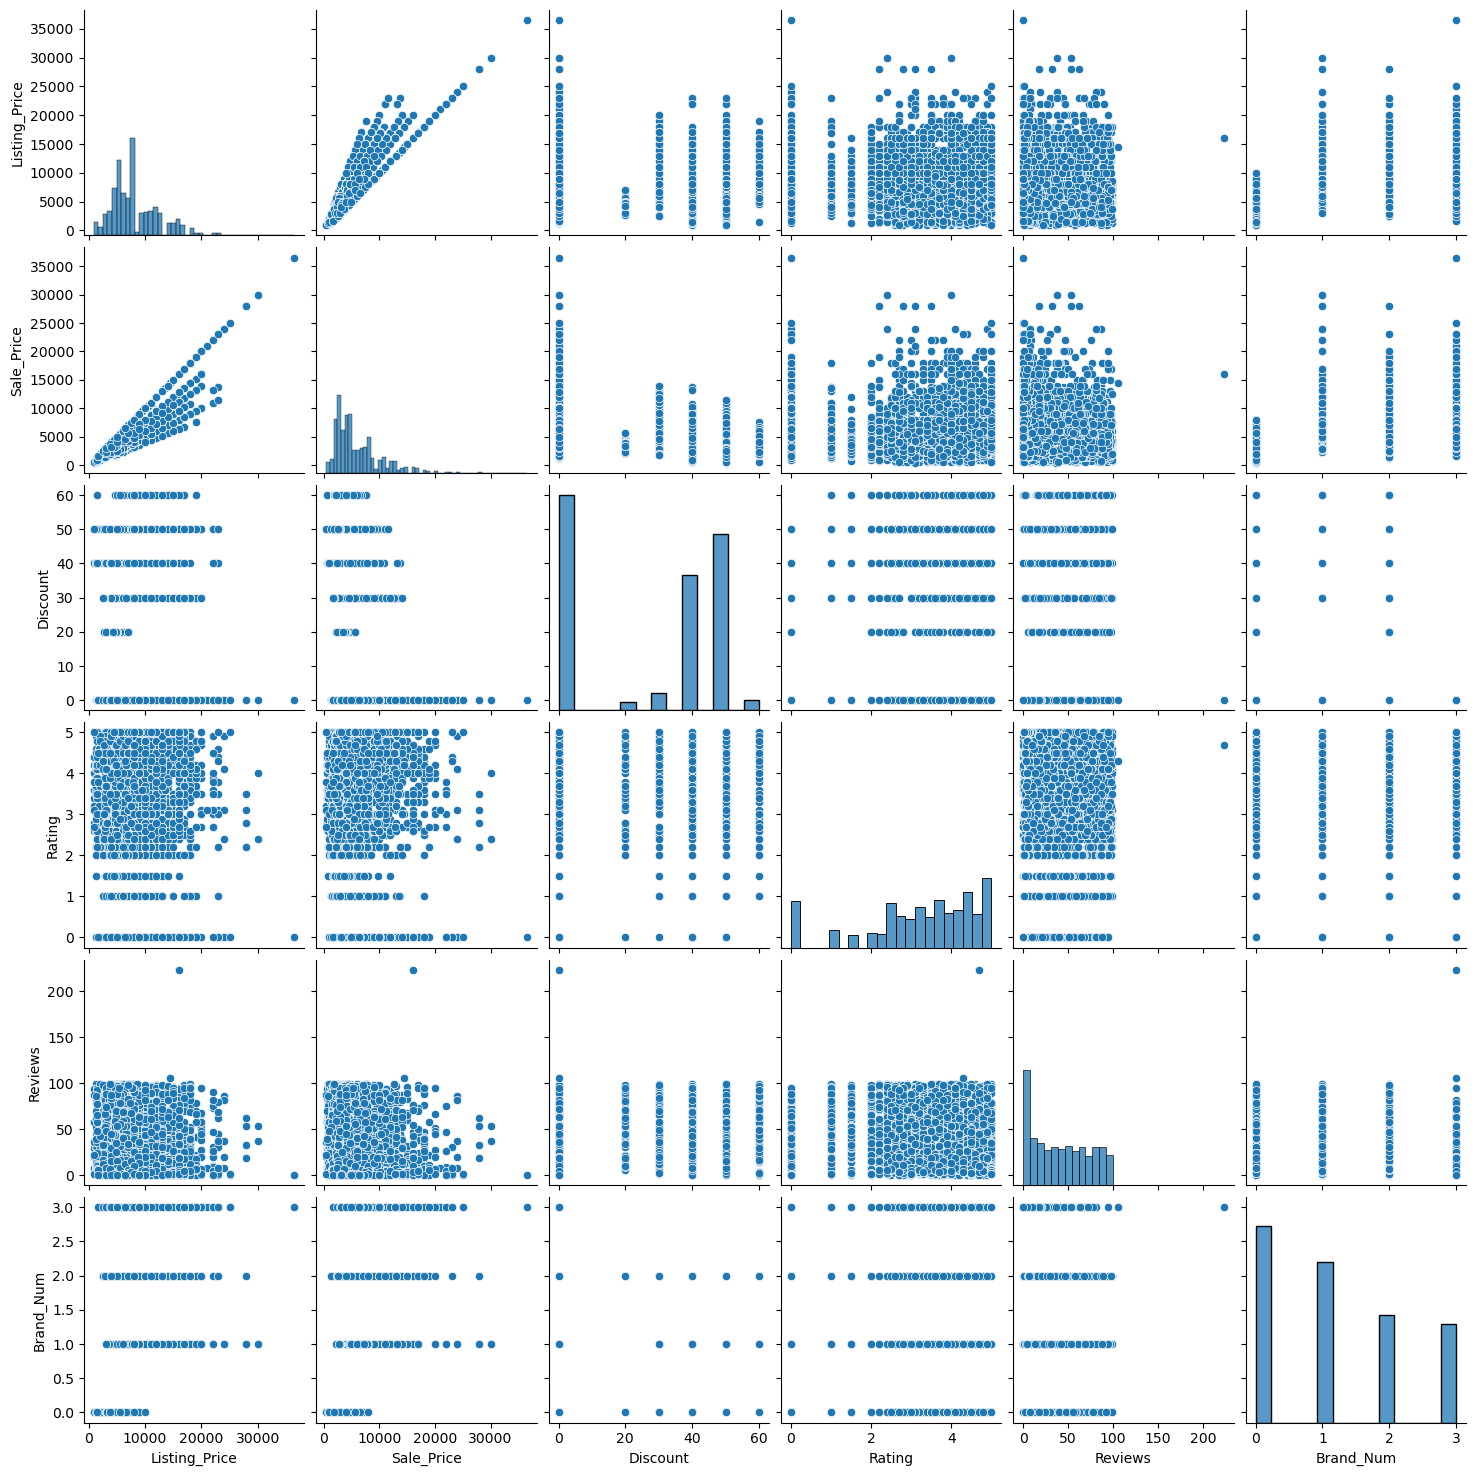

In [77]:
# create pairplot
sns.pairplot(sneakers);

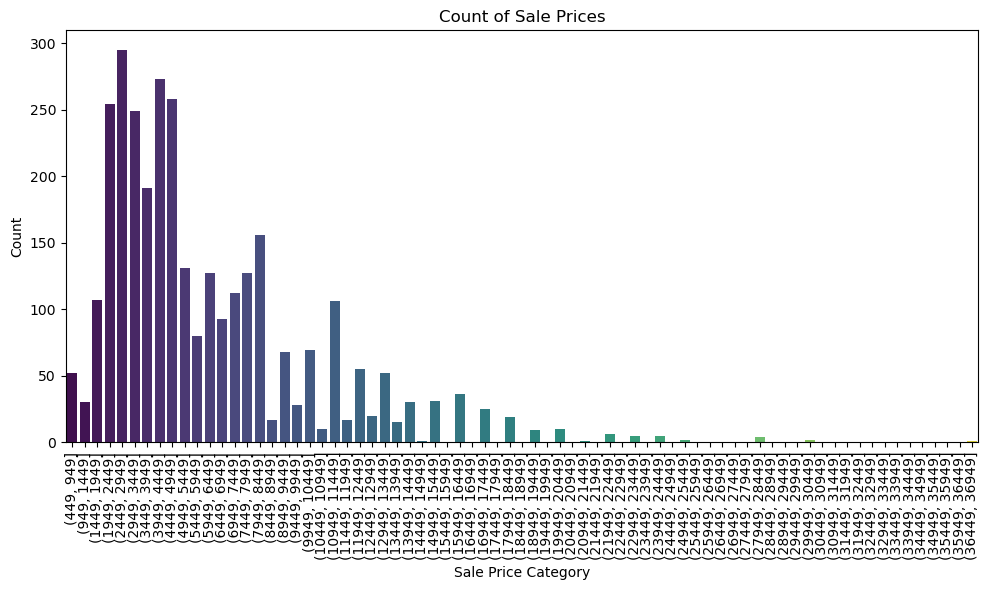

In [78]:
# Create a countplot to visualize the unique instances of each sale price  
# Define the range and width of each category
bin_width = 500   
min_price = sneakers['Sale_Price'].min()
max_price = sneakers['Sale_Price'].max()
bins = np.arange(min_price, max_price + bin_width, bin_width)

# Create a new column with the category labels
sneakers['Price_Category'] = pd.cut(sneakers['Sale_Price'], bins=bins)

# Create a countplot to visualize the unique instances of each price category
plt.figure(figsize=(10, 6))
sns.countplot(data=sneakers, x='Price_Category', palette='viridis')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Add title and axis labels
plt.title('Count of Sale Prices')
plt.xlabel('Sale Price Category')
plt.ylabel('Count')

# Remove grid lines
plt.grid(False)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show plot
plt.show()

observation: Most sneakers cost around 2500-3000 and 4000-5000

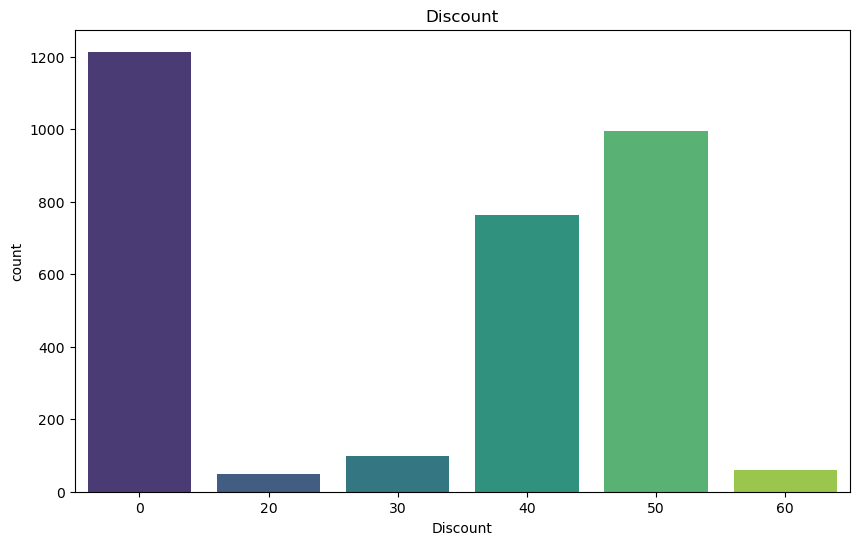

In [79]:
# Create a countplot to visualize the unique instances of discount 
plt.figure(figsize=(10, 6))
sns.countplot(data=sneakers, x='Discount', palette='viridis')

# Add title 
plt.title('Discount')


# Show plot
plt.show()

Observation: Highest discount percentage was 0 and the second highest was 50.

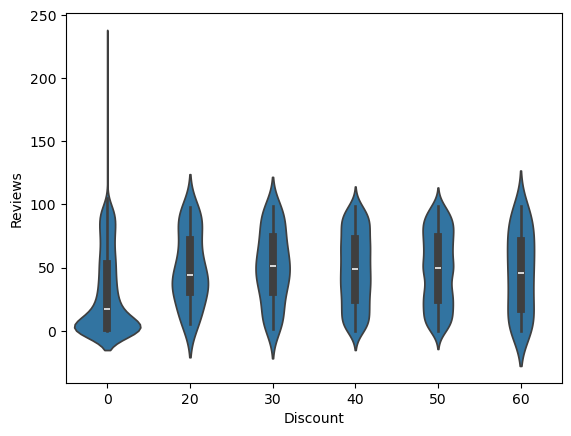

In [80]:
# Create a violin plot to show relationship between discount and the amount of reviews 
sns.violinplot(data=sneakers, x='Discount', y='Reviews');

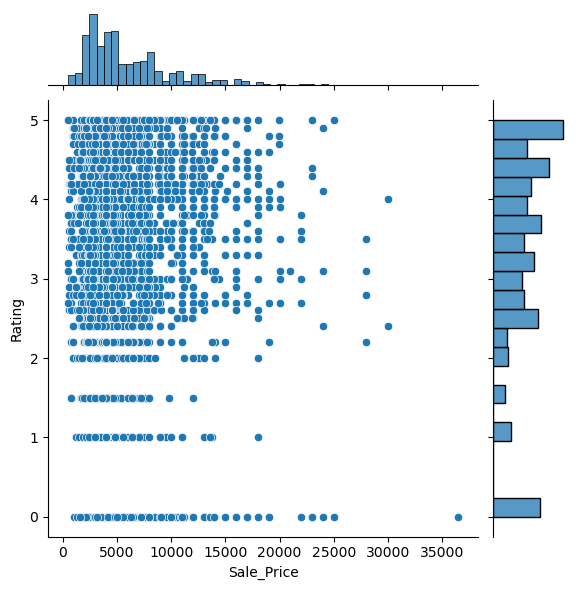

In [81]:
# Relationship between Sale price and Rating
sns.jointplot(data=sneakers, x='Sale_Price', y='Rating', kind='scatter');

observation: the higher the sale price, the lower the rating

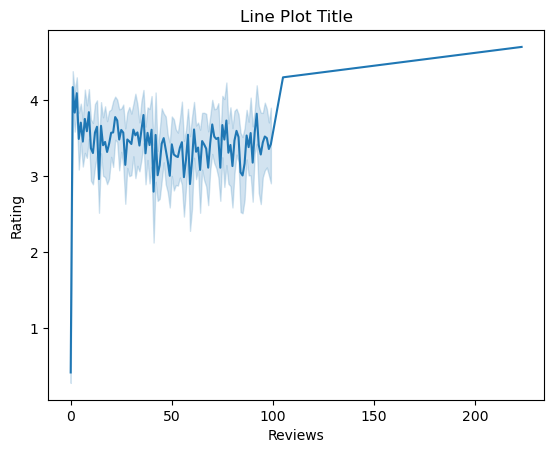

In [82]:
# Using Seaborn to create a line plot to show relationship between reviews and rating 
sns.lineplot(data=sneakers, x='Reviews', y='Rating')

# Optionally, you can add additional customizations or labels using Matplotlib
plt.title('Line Plot Title')
plt.xlabel('Reviews')
plt.ylabel('Rating')

# Show the plot
plt.show()

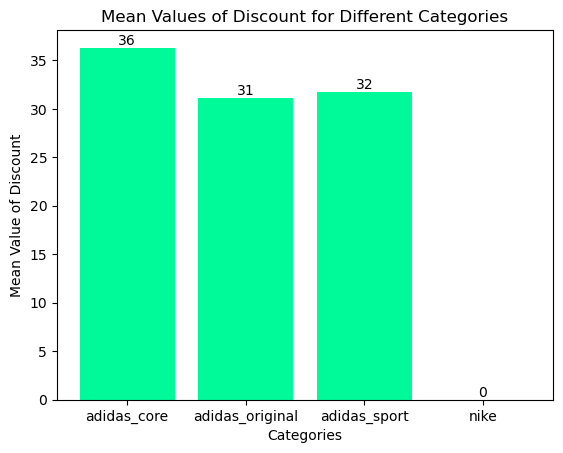

In [83]:
# Separate Brands for analysis
adidas_core = sneakers[sneakers['Brand']=='Adidas CORE / NEO']
adidas_original = sneakers[sneakers['Brand']=='Adidas ORIGINALS']
adidas_sport = sneakers[sneakers['Brand']=='Adidas SPORT PERFORMANCE']
nike = sneakers[sneakers['Brand']=='Nike']

categories = ['adidas_core', 'adidas_original', 'adidas_sport', 'nike']

# Define the mean values for each category
mean_values = [
    adidas_core['Discount'].mean(),
    adidas_original['Discount'].mean(),
    adidas_sport['Discount'].mean(),
    nike['Discount'].mean()
]

# Adding annotations to display the mean value on each bar
for i, mean in enumerate(mean_values):
    plt.text(i, mean, f'{mean:.0f}', ha='center', va='bottom')

# Plotting the bar graph
plt.bar(categories, mean_values, color='mediumspringgreen')
plt.xlabel('Categories')
plt.ylabel('Mean Value of Discount')
plt.title('Mean Values of Discount for Different Categories')
plt.show()

**D. EDA Summary** 

In conclusion, the exploratory data analysis (EDA) of the dataset revealed several key insights. The dataset consists of 26,144 records with 8 features, including both numerical and categorical variables. During the analysis, we observed that the average sale price of sneakers is 6027, with a standard deviation of 27. Additionally, we found that the majority of the sneakers in the dataframe was Adidas, with Nike only accounting for 17% of the dataframe. 

Furthermore, our analysis revealed a negative correlation between Sale Price and Rating, indicating that the more a sneaker costs the lower the rating. Additionally, there is a mildly positive relationship between Discount and Rating, and a bit higher positive relationship between Discount and Reviews indicating that a discount does positively influence the overall rating of the shoe. 

Moreover, through visualization techniques such as histograms and box plots, we identified several outliers in the dataset, particularly in the 'Sale Price' and 'Review' feature. These outliers may require further investigation to determine their impact on model performance.

Overall, the EDA provided valuable insights into the prices, discounts, and ratings of sneakers in the dataset. These findings can inform future analyses and decision-making processes, such as targeted marketing strategies or customer segmentation efforts.

## Step 5: Answering the Mining Questions 

## Data Mining Questions
1. What is the shape of the dataset?
   - The dataset consists of 3268 rows and 8 columns.
2. Are there any missing values in the dataset?
   - There are no missing values in the dataset, however, there are 0 values in some instances where we would expect to see a value like in Listing Price, Ratings (where reviews are present), and Reviews (where Rating is above 0.0)
3. List all 8 columns' dtypes:
   - Product Name:      object
   - Product ID:        object
   - Listing Price:      int64
   - Sale Price:         int64
   - Discount:           int64
   - Brand:             object
   - Rating:           float64
   - Reviews:            int64
4. Are there any duplicated rows (observations) in this dataset?
   - Yes, there are 88 duplicate rows.
5. Refer to the statistical summary of the dataset to answer to the following:
   - The average Listing Price: 86.40
   - The average Sale Price: 60.26
   - The average Discount: 31%
   - The average Rating: 3.35 
   - The average number of Reviews: 41
6. Which 'Brand' has the highest number of products in this dataset?
   - Adidas CORE / NEO brand has the highest number of products with 1111 entries.
7. How many products with 0 listing price are in this dataset?
   - The are 362 products in the dataset with a listing price of 0 after removing duplicate values.
8. Perform the "Univariate EDA", and examine any type of skewness (outliers) for all the variables:
   - One of the Nike shoes was much higher price point
9. Find percentage for the following:
    - Products with listing prices less than 15000: 92%
    - Products with sale price less than 15000: 96%
    - Products with at least 50% discount: 33%
    - Products with rating less than 3.5: 47%
    - Products with review numbers less than 100: 99.9%
    - The 3 highest percentages of the discount graph: - 50.0 : 31%
                                                       - 40.0: 25%
                                                       - 0.0: 21%
10. Perform the "Bivariate EDA", and examine the following:
    - The two highly positively correlated variables: Listing Price and Sale Price are the two most highly correlated variables, with a positive correlation value of 0.91.
    - The two highly negatively correlated variables: Discount and Sale Price are the highest negatively correlated variables with a nagative correlation value of -0.5.
11. What are the names of the 10 highest rated products?
**There are more than 10 maximum values of 5.0, with varying number of reviews represented, out of 193 instances maximum values of 5.0, these are the top Ratings with the highest number of Reviews** 
    - Men's adidas Running Asweego Shoes
    - Men's adidas Toe Side II Slippers
    - MEN'S ADIDAS RUNNING NAYO 2.0 SHOES
    - Men's adidas Sport Inspired Court Adapt Shoes
    - Men's adidas Originals Liberty Cup Shoes
    - WOMEN'S ADIDAS ORIGINALS ARKYN PRIMEKNIT SHOES
    - Men's adidas Originals Superstar MG Shoes
    - Men's adidas Sport Inspired Lite Racer RBN Shoes
    - Men's adidas Running Norad Shoes
    - MEN'S ADIDAS ORIGINALS GAZELLE SHOES 	
12. What are the 10 products' names with the highest number of reviews?
**There are 19 equal values of 99 reviews**
    - 2750 	Air Jordan 10 Retro 	223
    - 2804 	Nike Zoom Fly 	105
    - 89 	Men's adidas Running Galaxy 4 Shoes 	99
    - 267 	Men's adidas Toe Side II Slippers 	99
    - 319 	Men's adidas Sport Inspired Archivo Shoes 	99
    - 425 	Men's adidas Sport Inspired Run 60s Shoes 	99
    - 492 	Women's adidias Originals Supercourt Shoes 	99
    - 560 	Men's adidas Outdoor Geocach 19 Shoes 	99
    - 667 	Men's adidas RUNNING Stardrift Low Shoes 	99
    - 723 	Women's adidas Sport Inspired Farm Rio Advanta... 	99
13. Which company gives more discount: Adidas or Nike?
    - Adidas gives the highest discount overall, the brand line Adidas CORE / NEO is the highest category.

## Step 6: Conclusion 
1. In the dataset containing sneaker sale details, numerous instances of 0 values are observed where other numbers would typically be expected. These details encompass sales and list prices, brand information, and customer ratings.
2. Exploratory Data Analysis (EDA) offers insights into various relationships within the dataset, equipping us to formulate effective data mining inquiries. Althought he listing and sale price values are tricky to navigate. 
3. Basic data exploration aids in determining appropriate strategies for addressing missing values. This data did not have any missing values but there were values inappropriately set to zero.
4. Filling in missing values for Listing Price posed a challenge due to the wide range of potential values. Since Sale Price exhibited the highest correlation with Listing Price, it was utilized to replace missing Listing Prices.
5. At first, there were 5 unique instances in the column 5. We created a new dataframe to represent the two Brands we were analyzing: Nike and Adidas. 
6. Brand_num was a variable created to visualize the correlation between brand and other numerical values. A dictionary was created to store 0-3 values for each Brand category. 
7. Correlation is strongest between the Listing Price and Sale Price.
8. The second highest positively correlated variables are between Brand_num and Listing Price and Sale Price indicating that the brand name is positively correlated to values in Sale and Listing Price.
9. There are some visualization graphs that are more helpful than others. Although some graphs were not so helpful, we decided to keep them to show the readability differences.  
10. The heatmap was the most helpful in visualizing the correlations. 

End of lab.